<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/SVM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required packages
from sklearn import datasets		
from sklearn import svm    			
import numpy as np
import matplotlib.pyplot as plt            

In [2]:
#import iris data to model Svm classifier
iris_data=datasets.load_iris()

In [3]:
print(iris_data['DESCR'])#data description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

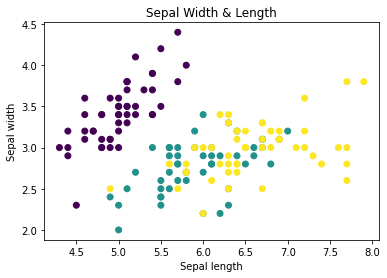

In [6]:
#visualize_sepal_data taking first two features
x=iris_data.data[:,:2]  
y=iris_data.target
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Width & Length')
plt.show()

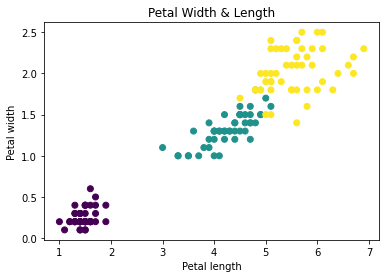

In [7]:
#visualize_petal_data taking last two features
x=iris_data.data[:,2:]  
y=iris_data.target
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width & Length')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=30)

In [9]:
#sepal features
x_sepal=x_train[:,:2] 
y_sepal=y_train

In [10]:
#SVM model with linear kernel
svc=svm.SVC(kernel='linear', C=1.0).fit(x_sepal,y_sepal)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=1.0,max_iter=3000).fit(x_sepal, y_sepal)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(x_sepal, y_sepal)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0).fit(x_sepal, y_sepal)

In [11]:
y_pred_svc=svc.predict(x_test[:,:2])
y_pred_lin_svc=lin_svc.predict(x_test[:,:2])
y_pred_rbf_svc=rbf_svc.predict(x_test[:,:2])
y_pred_poly_svc=poly_svc.predict(x_test[:,:2])

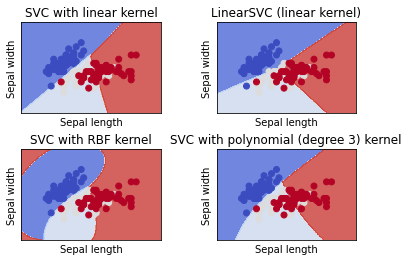

In [33]:
x=iris_data.data[:,:2]
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

In [12]:
from sklearn.metrics import accuracy_score as ac
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_test,y_pred_svc)*100)
print('SVM with linear svc:',ac(y_test,y_pred_lin_svc)*100)
print('SVM with kernel(rbf):',ac(y_test,y_pred_rbf_svc)*100)
print('SVM with kernel(poly):',ac(y_test,y_pred_poly_svc)*100)

Accuracy Score:
SVM with kernel(linear): 86.66666666666667
SVM with linear svc: 86.66666666666667
SVM with kernel(rbf): 83.33333333333334
SVM with kernel(poly): 83.33333333333334


In [14]:
print("Training Accuracy Score:")
print('SVM with kernel(linear):',svc.score(x_sepal,y_sepal)*100)
print('SVM with linear svc:',lin_svc.score(x_sepal,y_sepal)*100)
print('SVM with kernel(rbf):',rbf_svc.score(x_sepal,y_sepal)*100)
print('SVM with kernel(poly):',poly_svc.score(x_sepal,y_sepal)*100)

Training Accuracy Score:
SVM with kernel(linear): 80.83333333333333
SVM with linear svc: 79.16666666666666
SVM with kernel(rbf): 81.66666666666667
SVM with kernel(poly): 80.0


In [15]:
print("Testing Accuracy Score:")
print('SVM with kernel(linear):',svc.score(x_test[:,:2],y_test)*100)
print('SVM with linear svc:',lin_svc.score(x_test[:,:2],y_test)*100)
print('SVM with kernel(rbf):',rbf_svc.score(x_test[:,:2],y_test)*100)
print('SVM with kernel(poly):',poly_svc.score(x_test[:,:2],y_test)*100)

Testing Accuracy Score:
SVM with kernel(linear): 86.66666666666667
SVM with linear svc: 86.66666666666667
SVM with kernel(rbf): 83.33333333333334
SVM with kernel(poly): 83.33333333333334


In [16]:
#Petal Features
x_petal=x_train[:,2:] 
y_petal=y_train

In [22]:
#SVM model with linear kernel
svc1=svm.SVC(kernel='linear', C=1.0).fit(x_petal,y_petal)
# LinearSVC (linear kernel)
lin_svc1 = svm.LinearSVC(C=1.0,max_iter=3000).fit(x_petal, y_petal)
# SVC with RBF kernel
rbf_svc1 = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(x_petal, y_petal)
# SVC with polynomial (degree 3) kernel
poly_svc1 = svm.SVC(kernel='poly', degree=3, C=1.0).fit(x_petal, y_petal)

In [23]:
y_pred_svc1=svc1.predict(x_test[:,2:])
y_pred_lin_svc1=lin_svc1.predict(x_test[:,2:])
y_pred_rbf_svc1=rbf_svc1.predict(x_test[:,2:])
y_pred_poly_svc1=poly_svc1.predict(x_test[:,2:])

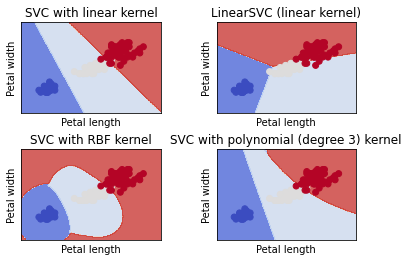

In [35]:
X=iris_data.data[:,2:]
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc1, lin_svc1, rbf_svc1, poly_svc1)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

In [24]:
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_test,y_pred_svc1)*100)
print('SVM with linear svc:',ac(y_test,y_pred_lin_svc1)*100)
print('SVM with kernel(rbf):',ac(y_test,y_pred_rbf_svc1)*100)
print('SVM with kernel(poly):',ac(y_test,y_pred_poly_svc1)*100)

Accuracy Score:
SVM with kernel(linear): 96.66666666666667
SVM with linear svc: 93.33333333333333
SVM with kernel(rbf): 96.66666666666667
SVM with kernel(poly): 96.66666666666667


In [25]:
print("Training Accuracy Score:")
print('SVM with kernel(linear):',svc1.score(x_petal,y_petal)*100)
print('SVM with linear svc:',lin_svc1.score(x_petal,y_petal)*100)
print('SVM with kernel(rbf):',rbf_svc1.score(x_petal,y_petal)*100)
print('SVM with kernel(poly):',poly_svc1.score(x_petal,y_petal)*100)

Training Accuracy Score:
SVM with kernel(linear): 96.66666666666667
SVM with linear svc: 93.33333333333333
SVM with kernel(rbf): 96.66666666666667
SVM with kernel(poly): 96.66666666666667


In [26]:
print("Testing Accuracy Score:")
print('SVM with kernel(linear):',svc1.score(x_test[:,2:],y_test)*100)
print('SVM with linear svc:',lin_svc1.score(x_test[:,2:],y_test)*100)
print('SVM with kernel(rbf):',rbf_svc1.score(x_test[:,2:],y_test)*100)
print('SVM with kernel(poly):',poly_svc1.score(x_test[:,2:],y_test)*100)

Testing Accuracy Score:
SVM with kernel(linear): 96.66666666666667
SVM with linear svc: 93.33333333333333
SVM with kernel(rbf): 96.66666666666667
SVM with kernel(poly): 96.66666666666667


In [27]:
#svm models with all features
svc2=svm.SVC(kernel='linear', C=1.0).fit(x_train,y_train)
lin_svc2 = svm.LinearSVC(C=1.0,max_iter=3000).fit(x_train, y_train)
rbf_svc2 = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(x_train, y_train)
poly_svc2 = svm.SVC(kernel='poly', degree=3, C=1.0).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
y_pred_svc2=svc2.predict(x_test)
y_pred_lin_svc2=lin_svc2.predict(x_test)
y_pred_rbf_svc2=rbf_svc2.predict(x_test)
y_pred_poly_svc2=poly_svc2.predict(x_test)

In [29]:
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_test,y_pred_svc2)*100)
print('SVM with linear svc:',ac(y_test,y_pred_lin_svc2)*100)
print('SVM with kernel(rbf):',ac(y_test,y_pred_rbf_svc2)*100)
print('SVM with kernel(poly):',ac(y_test,y_pred_poly_svc2)*100)

Accuracy Score:
SVM with kernel(linear): 96.66666666666667
SVM with linear svc: 93.33333333333333
SVM with kernel(rbf): 96.66666666666667
SVM with kernel(poly): 96.66666666666667
